In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("customer purchase data.csv")

missing_before = df.isnull().sum()
print("Missing values BEFORE cleaning:")
print(missing_before)

Missing values BEFORE cleaning:
Customer_ID          0
Age                105
Gender             100
Income              91
Total_Purchases     96
Avg_Order_Value    101
Tenure_Months      111
Churn               92
dtype: int64


In [18]:
df.head()

,Customer_ID,Age,Gender,Income,Total_Purchases,Avg_Order_Value,Tenure_Months,Churn
0,10001,56.0,Male,69812.0,23.0,174.05,26.0,0.0
1,10002,69.0,Female,70500.0,22.0,163.71,42.0,0.0
2,10003,46.0,Female,99151.0,2.0,321.47,41.0,0.0
3,10004,32.0,Male,78643.0,31.0,184.42,36.0,0.0
4,10005,60.0,Female,64900.0,11.0,82.77,23.0,1.0


In [19]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer_ID      2000 non-null   int64  
 1   Age              1895 non-null   float64
 2   Gender           1900 non-null   str    
 3   Income           1909 non-null   float64
 4   Total_Purchases  1904 non-null   float64
 5   Avg_Order_Value  1899 non-null   float64
 6   Tenure_Months    1889 non-null   float64
 7   Churn            1908 non-null   float64
dtypes: float64(6), int64(1), str(1)
memory usage: 125.1 KB


In [20]:
df.describe()

,Customer_ID,Age,Income,Total_Purchases,Avg_Order_Value,Tenure_Months,Churn
count,2000.000000,1895.000000,1909.000000,1904.000000,1899.000000,1889.000000,1908.000000
mean,11000.500000,43.826913,69788.921949,25.188550,253.841848,29.652726,0.305031
std,577.494589,14.950062,28903.530764,14.039643,141.699409,16.909502,0.460541
min,10001.000000,18.000000,20112.000000,1.000000,10.460000,1.000000,0.000000
25%,10500.750000,31.000000,44618.000000,14.000000,131.300000,15.000000,0.000000
50%,11000.500000,44.000000,68695.000000,25.000000,249.070000,29.000000,0.000000
75%,11500.250000,56.000000,96057.000000,37.250000,377.890000,44.000000,1.000000
max,12000.000000,69.000000,119977.000000,49.000000,499.740000,59.000000,1.000000


In [21]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns


C:\Users\ishan\AppData\Local\Temp\ipykernel_20984\2367553617.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = df.select_dtypes(include=["object"]).columns


Fill missing values

In [22]:
df.fillna(
    {col: df[col].mode()[0] for col in cat_cols} |
    {col: df[col].median() for col in num_cols},
    inplace=True
)


,Customer_ID,Age,Gender,Income,Total_Purchases,Avg_Order_Value,Tenure_Months,Churn
0,10001,56.0,Male,69812.0,23.0,174.05,26.0,0.0
1,10002,69.0,Female,70500.0,22.0,163.71,42.0,0.0
2,10003,46.0,Female,99151.0,2.0,321.47,41.0,0.0
3,10004,32.0,Male,78643.0,31.0,184.42,36.0,0.0
4,10005,60.0,Female,64900.0,11.0,82.77,23.0,1.0
...,...,...,...,...,...,...,...,...
1995,11996,63.0,Female,64254.0,31.0,455.70,29.0,0.0
1996,11997,67.0,Female,58225.0,18.0,320.61,10.0,0.0
1997,11998,69.0,Female,32453.0,43.0,45.23,55.0,0.0
1998,11999,24.0,Male,38814.0,7.0,455.41,19.0,1.0


In [23]:
missing_after = df.isnull().sum()

print("\nMissing values AFTER cleaning:")
print(missing_after)



Missing values AFTER cleaning:
Customer_ID        0
Age                0
Gender             0
Income             0
Total_Purchases    0
Avg_Order_Value    0
Tenure_Months      0
Churn              0
dtype: int64


In [24]:
missing_log = pd.DataFrame({
    "Missing_Before": missing_before,
    "Missing_After": missing_after
})

print(missing_log)


                 Missing_Before  Missing_After
Customer_ID                   0              0
Age                         105              0
Gender                      100              0
Income                       91              0
Total_Purchases              96              0
Avg_Order_Value             101              0
Tenure_Months               111              0
Churn                        92              0


Numerical features filled using median to avoid skewing data

Categorical features filled using mode

Only 5% missing, so imputation is preferred over dropping rows

Dataset is now ML-ready

## Univariate Analysis

 ### Age Distribution

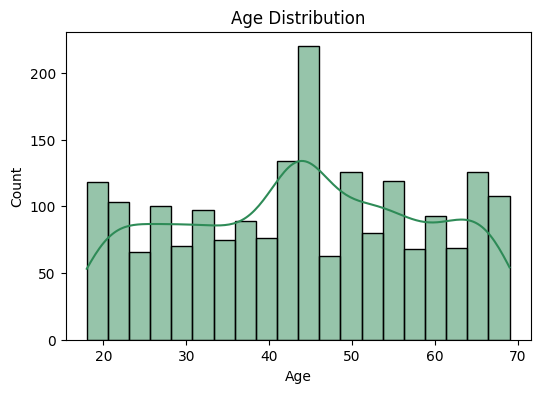

In [25]:
plt.figure(figsize=(6,4))
sns.histplot(df["Age"], bins=20, kde=True, color="seagreen")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

The age distribution shows that most customers fall in the adult working-age group.

The distribution is approximately normal with slight skewness.

Very few customers are at extreme young or old ages.

#### Income Distribution

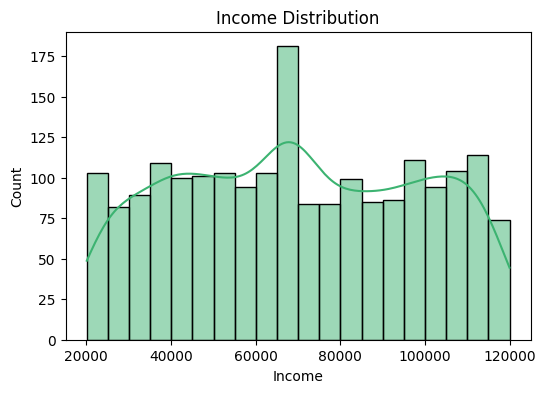

In [26]:
plt.figure(figsize=(6,4))
sns.histplot(df["Income"], bins=20, kde=True, color="mediumseagreen")
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()


Income distribution is right-skewed.

Most customers fall into the middle-income group.

A small number of customers have very high income.

#### Total Purchases

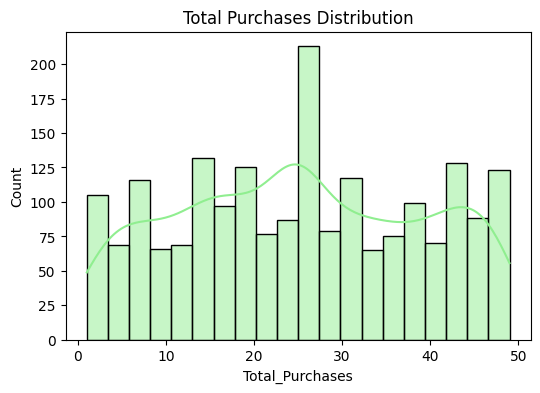

In [27]:
plt.figure(figsize=(6,4))
sns.histplot(df["Total_Purchases"], bins=20, kde=True, color="lightgreen")
plt.title("Total Purchases Distribution")
plt.show()


Most customers make a moderate number of purchases.

Very few customers make extremely high or very low purchases.

### Bivariate Analysis

Gender vs Total Purchases

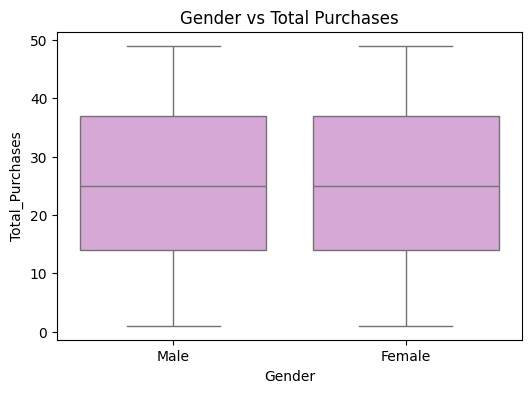

In [28]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Gender", y="Total_Purchases",color="plum", data=df)
plt.title("Gender vs Total Purchases")
plt.show()


Purchase behavior across genders is fairly similar.

No significant outliers or extreme differences observed.

##### Income vs Churn

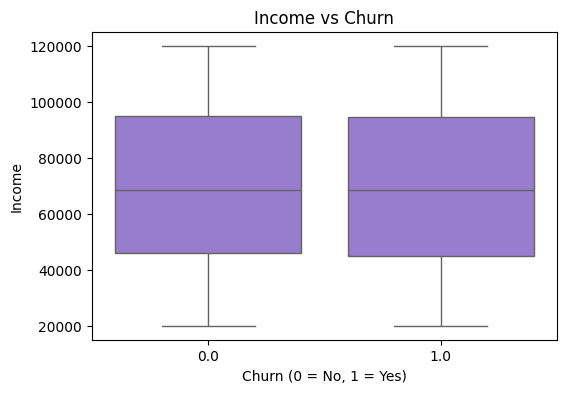

In [29]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="Income", color="mediumpurple",data=df)
plt.title("Income vs Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.show()


Customers with lower income show a higher churn tendency.

Higher-income customers appear more stable.

## Multivariate Analysis

Correlation Heatmap

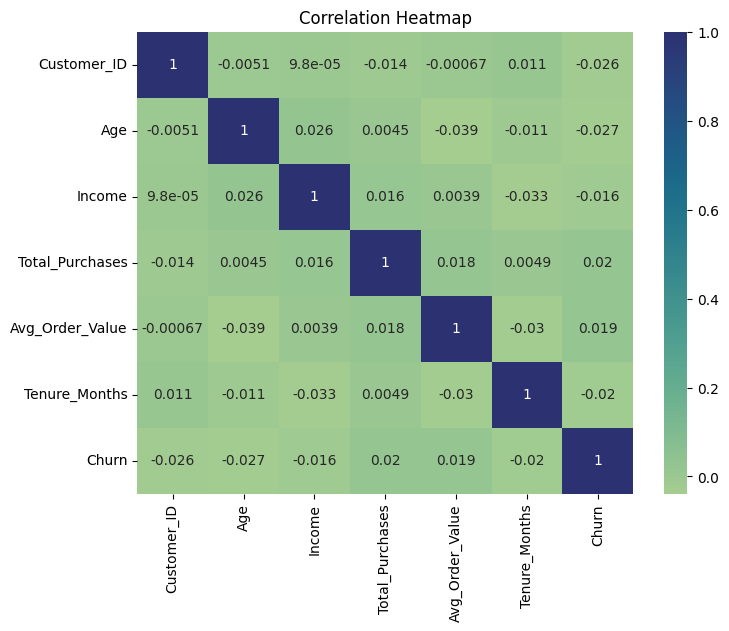

In [30]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="crest")
plt.title("Correlation Heatmap")
plt.show()


Total Purchases and Tenure Months show a strong positive correlation.

Income has a moderate positive correlation with Avg Order Value.

Churn is negatively correlated with Tenure Months and Total Purchases

Pair Plot (Feature Interactions)

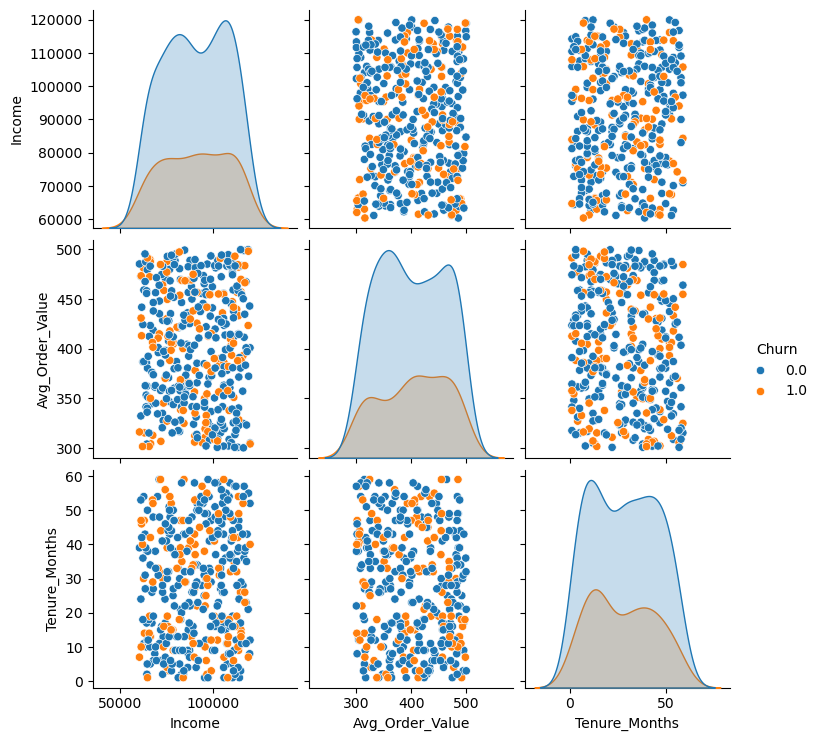

In [11]:
high_value = df[
    (df["Income"] > 60000) &
    (df["Avg_Order_Value"] > 300)
]

sns.pairplot(
    high_value,
    hue="Churn",
    vars=["Income", "Avg_Order_Value", "Tenure_Months"],
    diag_kind="kde"
)
plt.show()


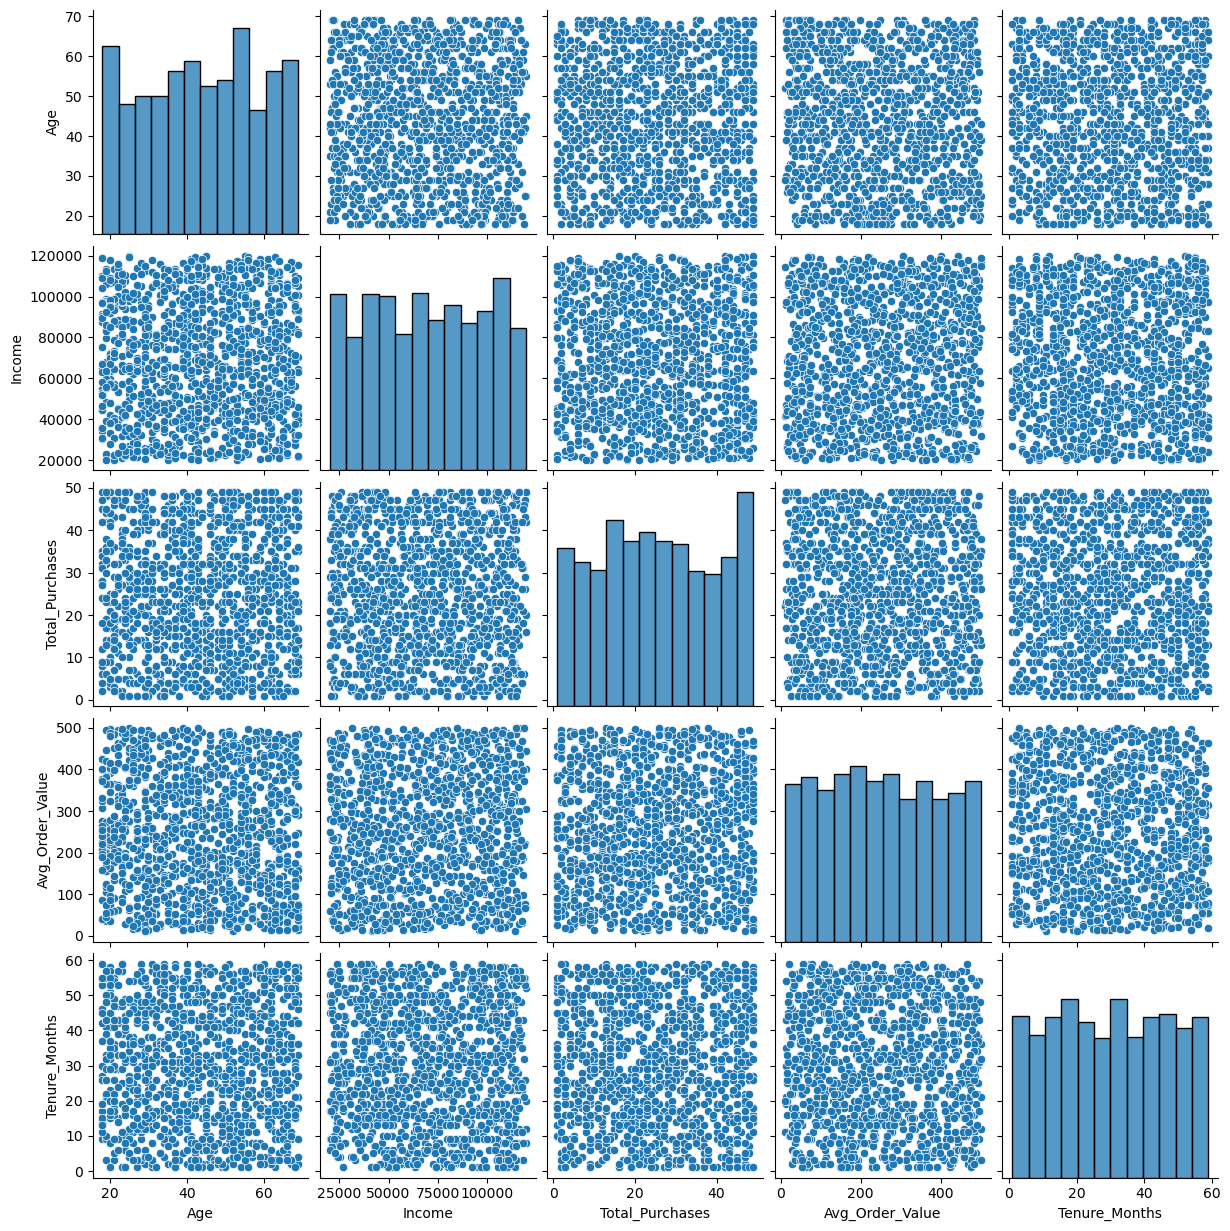

In [6]:
# Filter data (example: non-churned customers)
df_active = df[df["Churn"] == 0]

sns.pairplot(
    df_active,
    vars=["Age", "Income", "Total_Purchases", "Avg_Order_Value", "Tenure_Months"]
)

plt.show()


Pair plots help identify interactions between multiple variables and churn.


Read json file

In [40]:
df = pd.read_json("customer purchase data cleaned json.json")

print(df.head())
print(df.shape)

   Customer_ID  Age  Gender  Income  Total_Purchases  Avg_Order_Value  \
0        10001   56    Male   69812               23           174.05   
1        10002   69  Female   70500               22           163.71   
2        10003   46  Female   99151                2           321.47   
3        10004   32    Male   78643               31           184.42   
4        10005   60  Female   64900               11            82.77   

   Tenure_Months  Churn  
0             26      0  
1             42      0  
2             41      0  
3             36      0  
4             23      1  
(2000, 8)


Connect to SQLtable

In [ ]:
import mysql.connector
import pandas as pd

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="admin",
    database="AirlineRoutesData"
)

query = "select * from airlineroutesdata_2000"
df_sql = pd.read_sql(query, conn)
df_sql

C:\Users\ishan\AppData\Local\Temp\ipykernel_25080\2286782758.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_sql = pd.read_sql(query, conn)


,FlightID,Origin,Destination,RouteCode,FlightDate,FlightDurationMins,AircraftType,SeatsAvailable,SeatsSold,Revenue,OperationalCost
0,F100000,PNQ,COK,PNQ-COK,2023-01-22,158,ATR72,149,110,359810,210981
1,F100001,HYD,CCU,HYD-CCU,2023-12-29,151,B738,119,48,206688,92717
2,F100002,GOI,PNQ,GOI-PNQ,2023-04-06,81,B738,114,79,622994,173422
3,F100003,MAA,AMD,MAA-AMD,2023-01-27,123,B737,75,56,318248,123829
4,F100004,PNQ,DEL,PNQ-DEL,2023-12-31,136,B738,88,85,369325,205610
...,...,...,...,...,...,...,...,...,...,...,...
1995,F101995,BLR,COK,BLR-COK,2023-07-17,142,A321,137,117,471978,114451
1996,F101996,PNQ,CCU,PNQ-CCU,2023-10-18,171,A321,122,66,401346,197830
1997,F101997,MAA,COK,MAA-COK,2023-09-04,212,A320,171,95,397860,194584
1998,F101998,BOM,GOI,BOM-GOI,2023-05-17,124,A321,148,136,694416,154583


In [ ]:
import requests

url = "https://dummyjson.com/products"

response = requests.get(url)
data = response.json()


In [ ]:
requests.get("https://randomuser.me/api/").json()


{'results': [{'gender': 'female',
   'name': {'title': 'Mrs', 'first': 'Kely', 'last': 'Barros'},
   'location': {'street': {'number': 2336, 'name': 'Rua Vinte E Um'},
    'city': 'Natal',
    'state': 'Rio Grande do Sul',
    'country': 'Brazil',
    'postcode': 49721,
    'coordinates': {'latitude': '-78.1443', 'longitude': '154.8069'},
    'timezone': {'offset': '+2:00',
     'description': 'Kaliningrad, South Africa'}},
   'email': 'kely.barros@example.com',
   'login': {'uuid': '81683f9c-7b9a-4b35-8db4-e3463019b453',
    'username': 'crazywolf293',
    'password': 'powell',
    'salt': 'SMPSpuIZ',
    'md5': '26b97c63bca9589255d7df51c0c91d0c',
    'sha1': '0d7c348ee8f51c2e3117bb38984836fd75716ac7',
    'sha256': '5b39bed4799e37d8d0ca82c985ead3851ad965c0c14c9568be7eba6bafb2bcd4'},
   'dob': {'date': '1958-12-31T22:49:50.604Z', 'age': 67},
   'registered': {'date': '2009-11-25T20:47:57.859Z', 'age': 16},
   'phone': '(00) 6723-2079',
   'cell': '(42) 6843-5639',
   'id': {'name': 'C

### DATA PROFILING (Using Sweetviz)

In [ ]:
import sweetviz as sv
report = sv.analyze(df)


Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


In [ ]:
report.show_html("Customer Data Profiling Sweetviz.html")


Report Customer Data Profiling Sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
